## Final Goal
- Explore the best way to visualize the data (bar chart or map) and determine which dataset to use.

## Actions
- Considered and documented the thought process about visualization options.
- This notebook was not directly used in the final article.


In [ ]:
!pip install geopandas matplotlib japanize-matplotlib

In [ ]:
!pip install japanize-matplotlib

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import japanize_matplotlib


#print(df.head())        # 先頭5行を表示
#print(df.tail(3))       # 末尾3行を表示
#print(df.info())        # データの概要を表示
#print(df.describe())    # 基本統計量を表示
#print(df.shape)         # (行数, 列数)
#print(df.columns)       # 列名一覧
#print(df.dtypes)        # 各列のデータ型

In [ ]:
os.getcwd()

In [36]:
df = pd.read_csv('result_all.csv')

print(df.shape[0])

3293


In [37]:
df.columns

Index(['0', '種類', 'トンネル名', '(ﾌﾘｶﾞﾅ)', '路線名', '区分', '管理者名', '管理事務所名\n（地公体は任意）',
       '都道府県名', '市区町村名', '緯度', '経度', '建設年度\n（西暦 4桁）', '供用年度\n（西暦 4桁）', '延長（ｍ）',
       '幅員（ｍ）', '年度', '判定区分', '措置状況'],
      dtype='object')

In [38]:
print(df.head())

    0    種類       トンネル名          (ﾌﾘｶﾞﾅ)       路線名    区分     管理者名  \
0 NaN  トンネル      京上トンネル    (ｷｮｳｼﾞｮｳﾄﾝﾈﾙ)    国道439号  都道府県      徳島県   
1 NaN  トンネル      石塚トンネル      (ｲｼﾂﾞｶﾄﾝﾈﾙ)     国道45号     国  東北地方整備局   
2 NaN  トンネル    ずみの窪トンネル    (ｽﾞﾐﾉｸﾎﾞﾄﾝﾈﾙ)    国道158号  都道府県      長野県   
3 NaN  トンネル  滝川トンネル（１号）      (ﾀｷｶﾞﾜﾄﾝﾈﾙ)  県道小野･富岡線  都道府県      福島県   
4 NaN  トンネル       大黒岩隧道  (ｵｵｸﾞﾛｲﾜｽﾞｲﾄﾞｳ)   村道羽沢桧沢線  市区町村      南牧村   

  管理事務所名\n（地公体は任意） 都道府県名 市区町村名         緯度          経度  建設年度\n（西暦 4桁）  \
0      西部総合県民局(三好)   徳島県   三好市  33.86192度  133.90099度         2001.0   
1       南三陸沿岸国道事務所   岩手県   釜石市  39.22133度  141.87493度         1969.0   
2          松本建設事務所   長野県   松本市  36.13583度  137.72639度         1966.0   
3          富岡土木事務所   福島県   富岡町  37.35398度   140.9133度         2001.0   
4            振興整備課   群馬県   南牧村  36.14167度  138.67083度         1984.0   

   供用年度\n（西暦 4桁）   延長（ｍ）  幅員（ｍ）      年度 判定区分    措置状況  
0         2003.0  1023.0    8.5  2023年度    Ⅲ   措置未着手  
1            NaN  1351.0    8.6  2023年度   


【都道府県別の判定区分Ⅲ,Ⅳにおける措置状況】
        総数  未着手数  完了数  着手数  未着手率(%)  完了率(%)  着手率(%)
都道府県名                                              
東京都     41    36    3    2    87.80    7.32    4.88
滋賀県     13    11    1    1    84.62    7.69    7.69
石川県     40    27    7    6    67.50   17.50   15.00
熊本県     75    49    3   23    65.33    4.00   30.67
京都府     37    23    3   10    62.16    8.11   27.03
沖縄県      9     5    3    1    55.56   33.33   11.11
埼玉県     20    11    7    2    55.00   35.00   10.00
新潟県    149    79   28   42    53.02   18.79   28.19
三重県     59    30   26    3    50.85   44.07    5.08
佐賀県      2     1    1    0    50.00   50.00    0.00
群馬県     70    35   31    4    50.00   44.29    5.71
広島県    189    94   53   42    49.74   28.04   22.22
北海道    171    85   38   48    49.71   22.22   28.07
長野県    132    65   28   39    49.24   21.21   29.55
静岡県    116    57   30   29    49.14   25.86   25.00
兵庫県     55    27   20    8    49.09   36.36   14.55
福島県    128    62   32   34    48.44   2

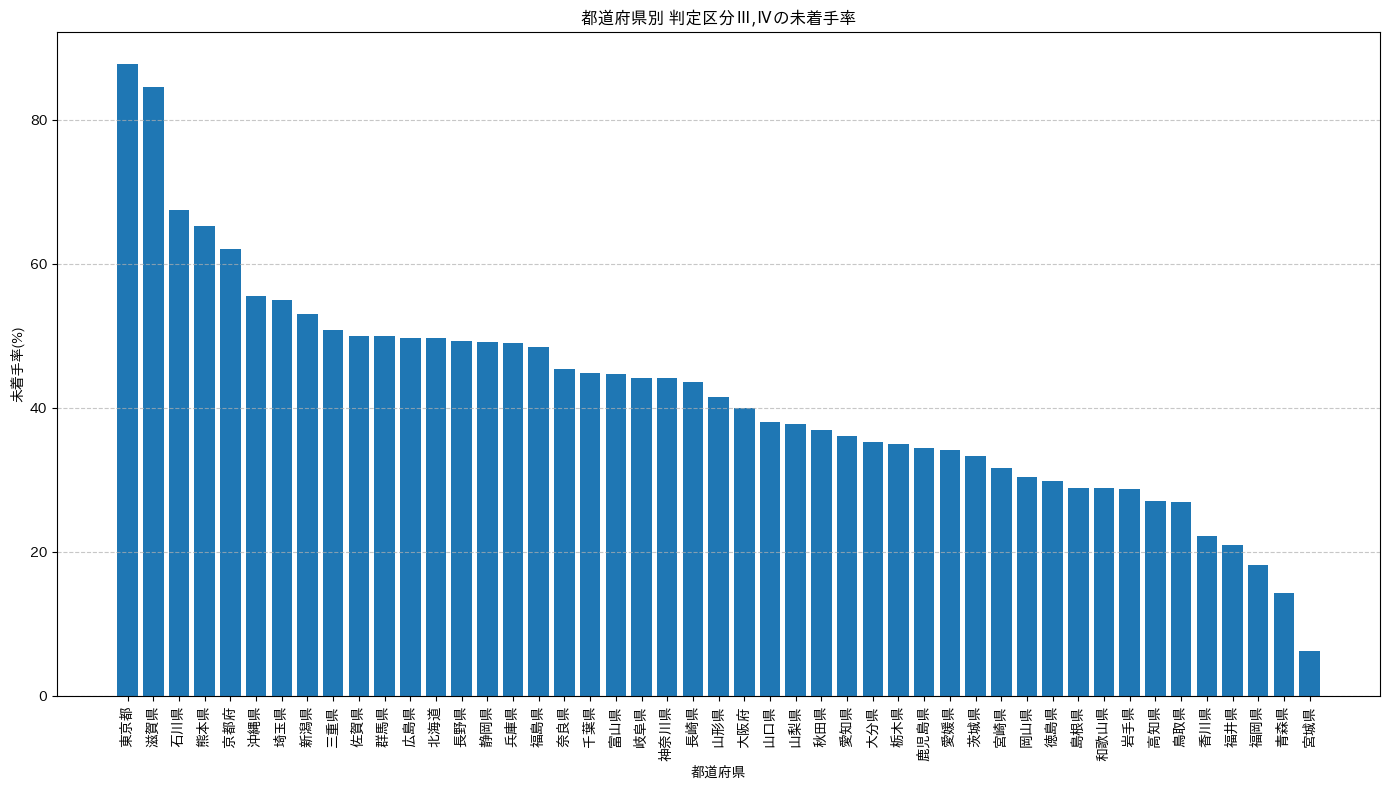

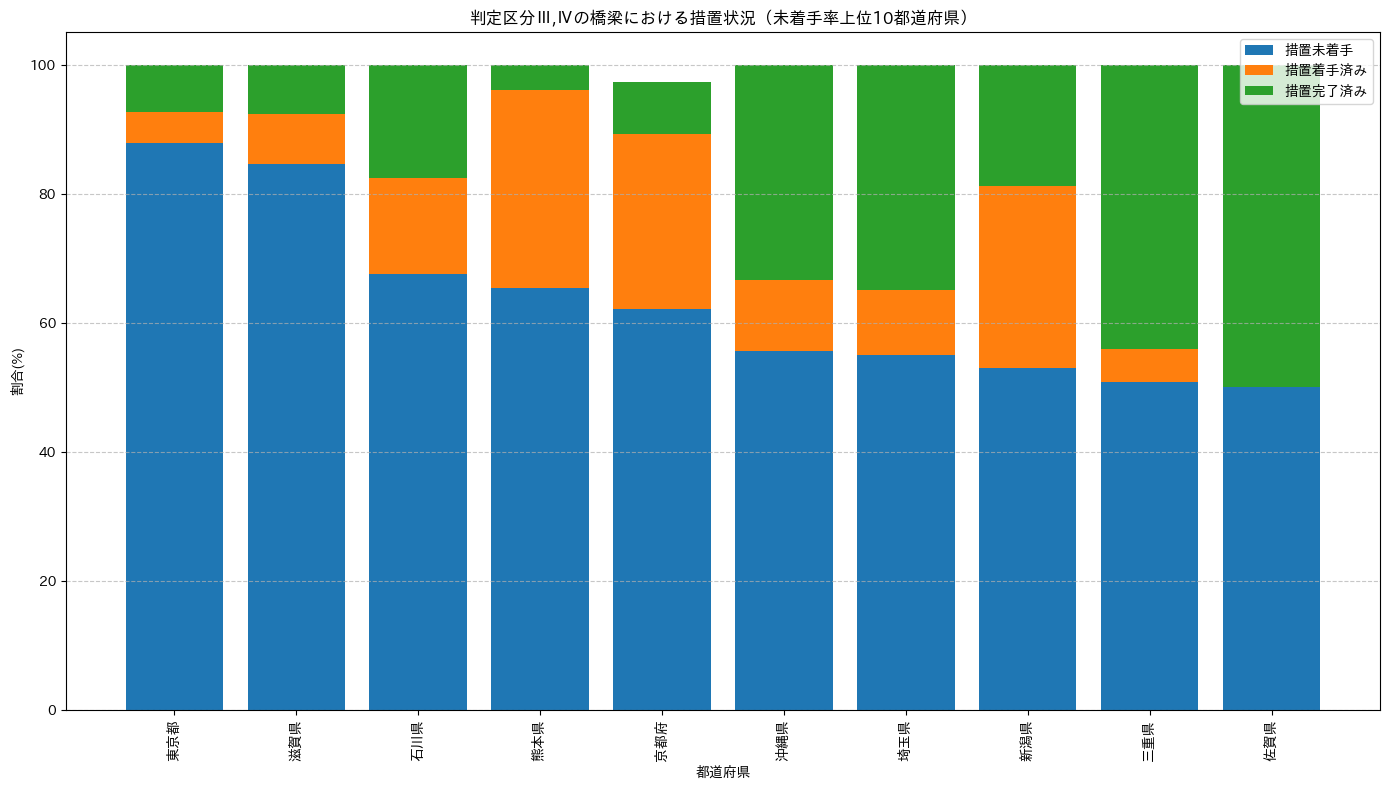

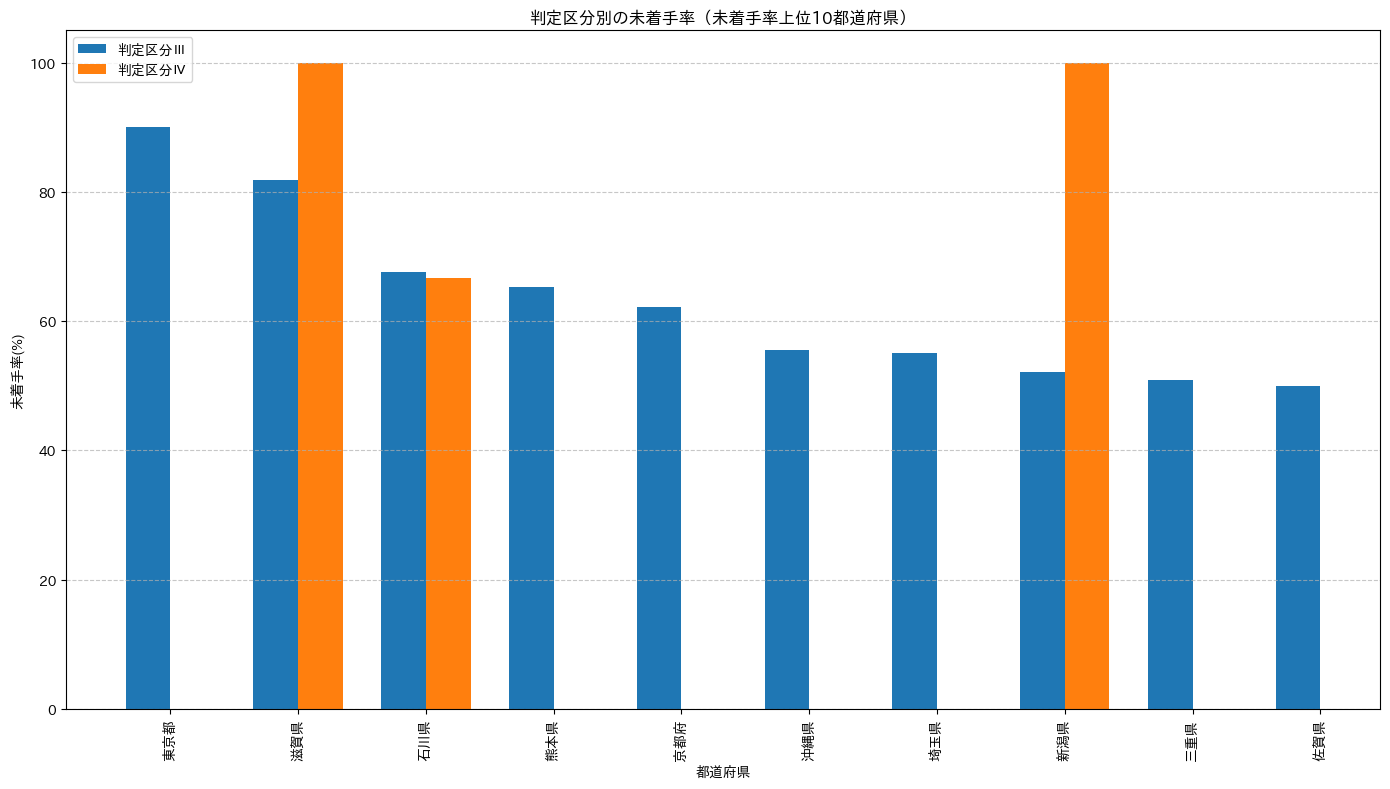

In [39]:
import pandas as pd
import numpy as np


df = pd.read_csv('result_all.csv', encoding='utf-8')

df_filtered = df[df['判定区分'].isin(['Ⅲ', 'Ⅳ'])]

df_filtered['未着手フラグ'] = df_filtered['措置状況'] == '措置未着手'
df_filtered['完了フラグ'] = df_filtered['措置状況'] == '措置完了済み'
df_filtered['着手フラグ'] = df_filtered['措置状況'] == '措置着手済み'

result = df_filtered.groupby('都道府県名').agg(
    総数=('判定区分', 'count'),
    未着手数=('未着手フラグ', 'sum'),
    完了数=('完了フラグ', 'sum'),
    着手数=('着手フラグ', 'sum')
)

result['未着手率(%)'] = (result['未着手数'] / result['総数'] * 100).round(2)
result['完了率(%)'] = (result['完了数'] / result['総数'] * 100).round(2)
result['着手率(%)'] = (result['着手数'] / result['総数'] * 100).round(2)

result_sorted = result.sort_values('未着手率(%)', ascending=False)

print("\n【都道府県別の判定区分Ⅲ,Ⅳにおける措置状況】")
print(result_sorted)

result_sorted.to_csv('都道府県別_措置状況分析.csv', encoding='utf-8')

detailed_result = df_filtered.groupby(['都道府県名', '判定区分']).agg(
    総数=('判定区分', 'count'),
    未着手数=('未着手フラグ', 'sum'),
    完了数=('完了フラグ', 'sum'),
    着手数=('着手フラグ', 'sum')
)

detailed_result['未着手率(%)'] = (detailed_result['未着手数'] / detailed_result['総数'] * 100).round(2)
detailed_result['完了率(%)'] = (detailed_result['完了数'] / detailed_result['総数'] * 100).round(2)
detailed_result['着手率(%)'] = (detailed_result['着手数'] / detailed_result['総数'] * 100).round(2)

print("\n【判定区分別の都道府県ごとの措置状況】")
print(detailed_result)

detailed_result.to_csv('判定区分別_都道府県_措置状況.csv', encoding='utf-8')

try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(14, 8))
    plt.bar(result_sorted.index, result_sorted['未着手率(%)'])
    plt.title('都道府県別 判定区分Ⅲ,Ⅳの未着手率')
    plt.xlabel('都道府県')
    plt.ylabel('未着手率(%)')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('都道府県別_未着手率グラフ.png')
    plt.show()
    
    top_prefectures = result_sorted.head(10)
    
    plt.figure(figsize=(14, 8))
    
    categories = top_prefectures.index
    width = 0.8
    
    plt.bar(categories, top_prefectures['未着手率(%)'], width, label='措置未着手')
    plt.bar(categories, top_prefectures['着手率(%)'], width, bottom=top_prefectures['未着手率(%)'], label='措置着手済み')
    plt.bar(categories, top_prefectures['完了率(%)'], width, 
            bottom=top_prefectures['未着手率(%)']+top_prefectures['着手率(%)'], label='措置完了済み')
    
    plt.xlabel('都道府県')
    plt.ylabel('割合(%)')
    plt.title('判定区分Ⅲ,Ⅳの橋梁における措置状況（未着手率上位10都道府県）')
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('上位10都道府県_措置状況割合.png')
    plt.show()
    
    pivot_df = detailed_result['未着手率(%)'].unstack()
    
    top10_prefectures = result_sorted.index[:10]
    pivot_top10 = pivot_df.loc[top10_prefectures]
    
    plt.figure(figsize=(14, 8))
    
    x = np.arange(len(pivot_top10.index))
    width = 0.35
    
    if 'Ⅲ' in pivot_top10.columns:
        plt.bar(x - width/2, pivot_top10['Ⅲ'], width, label='判定区分Ⅲ')
    
    if 'Ⅳ' in pivot_top10.columns:
        plt.bar(x + width/2, pivot_top10['Ⅳ'], width, label='判定区分Ⅳ')
    
    plt.xlabel('都道府県')
    plt.ylabel('未着手率(%)')
    plt.title('判定区分別の未着手率（未着手率上位10都道府県）')
    plt.xticks(x, pivot_top10.index, rotation=90)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('上位10都道府県_判定区分別未着手率.png')
    plt.show()
    
except Exception as e:
    print(f"グラフの作成に失敗しました: {e}")
    print("必要に応じて matplotlib をインストールするか、グラフ作成部分をスキップしてください。")

全国平均未着手率: 41.61%
地図データの列名: Index(['nam', 'nam_ja', 'id', 'geometry'], dtype='object')


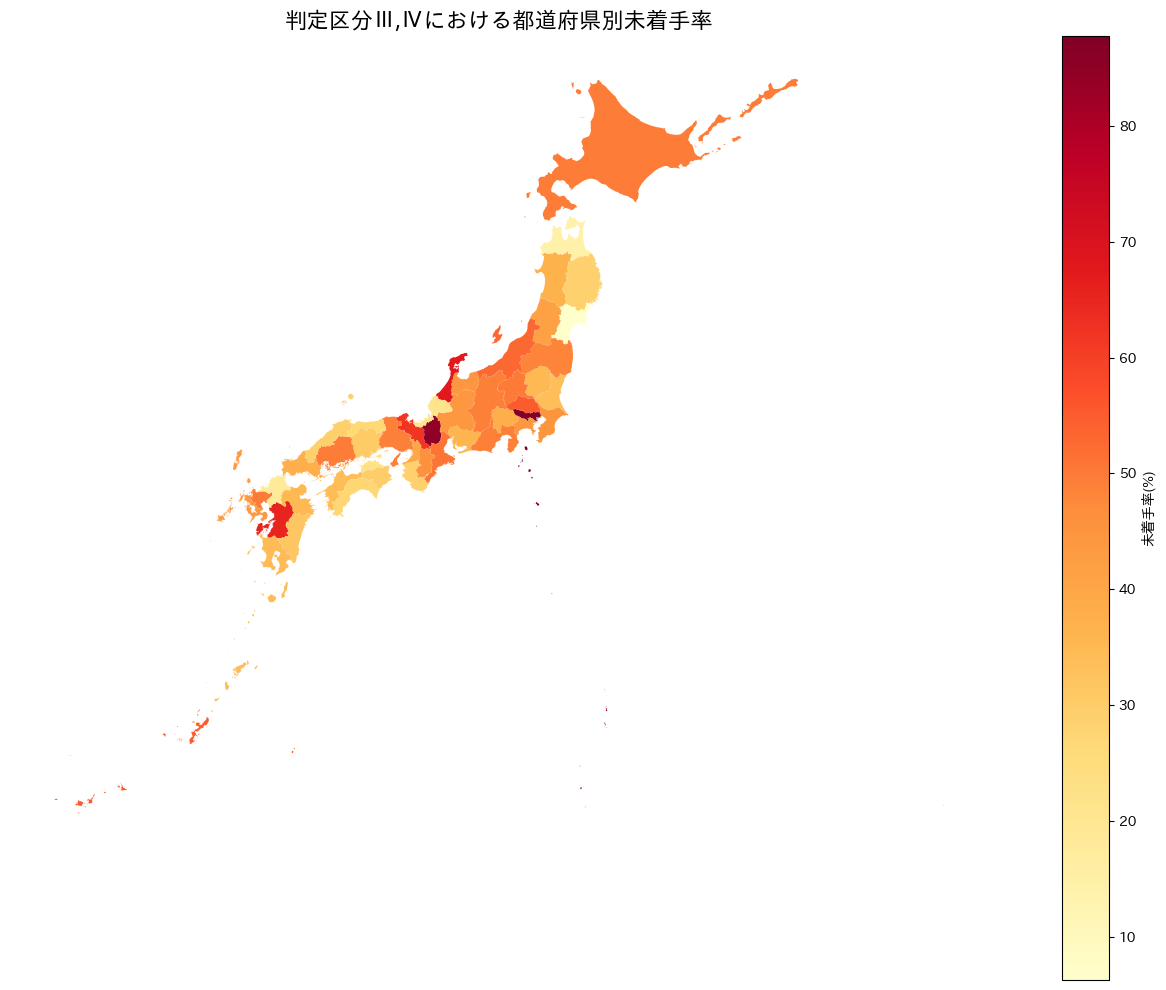

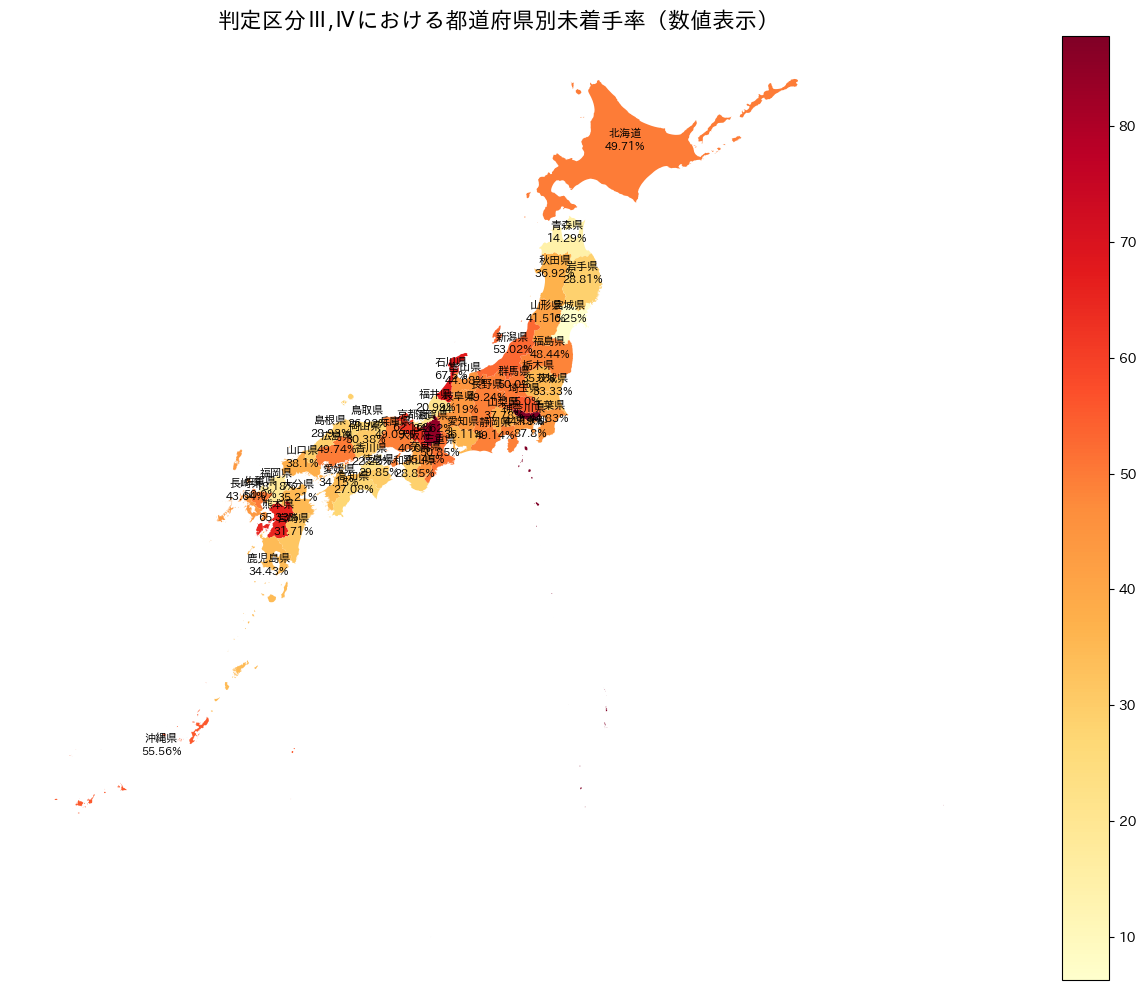

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import japanize_matplotlib  

df = pd.read_csv('result_all.csv', encoding='utf-8')

df_filtered = df[df['判定区分'].isin(['Ⅲ', 'Ⅳ'])]

df_filtered['未着手フラグ'] = df_filtered['措置状況'] == '措置未着手'

result = df_filtered.groupby('都道府県名').agg(
    総数=('判定区分', 'count'),
    未着手数=('未着手フラグ', 'sum')
)

result['未着手率(%)'] = (result['未着手数'] / result['総数'] * 100).round(2)

result_sorted = result.sort_values('未着手率(%)', ascending=False)

national_average = (result['未着手数'].sum() / result['総数'].sum() * 100).round(2)
print(f"全国平均未着手率: {national_average}%")

try:
    japan_map = gpd.read_file('https://raw.githubusercontent.com/dataofjapan/land/master/japan.geojson')
    
    print("地図データの列名:", japan_map.columns)
    
    if 'nam_ja' in japan_map.columns:
        japan_map['prefecture'] = japan_map['nam_ja']
    elif 'name' in japan_map.columns:
        japan_map['prefecture'] = japan_map['name']
    
    result_sorted = result_sorted.reset_index()
    
    # 地図データと分析結果をマージ
    # 注: 都道府県名の表記が合わない場合は調整が必要
    merged_data = japan_map.merge(result_sorted, left_on='prefecture', right_on='都道府県名', how='left')
    
    # 色分けマップの作成
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    # カラーマップの設定 (未着手率が高いほど赤く、低いほど青くする)
    cmap = plt.cm.YlOrRd  # 黄色→オレンジ→赤のカラーマップ
    
    # 未着手率に基づいて地図を色分け
    merged_data.plot(column='未着手率(%)', 
                     ax=ax,
                     legend=True,
                     cmap=cmap,
                     missing_kwds={'color': 'lightgrey'},
                     legend_kwds={'label': '未着手率(%)'})
    
    # 全国平均値に基づく色の境界線を追加
    # norm = mcolors.Normalize(vmin=0, vmax=max(merged_data['未着手率(%)'].max(), national_average*1.5))
    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])
    # cbar = fig.colorbar(sm, ax=ax)
    # cbar.ax.axhline(y=national_average, color='red', linestyle='-', linewidth=2)
    # cbar.ax.text(1.1, national_average, f'全国平均 {national_average}%', va='center')
    
    # タイトルと設定
    plt.title('判定区分Ⅲ,Ⅳにおける都道府県別未着手率', fontsize=16)
    plt.axis('off')  # 軸を非表示
    plt.tight_layout()
    
    # 図を保存
    plt.savefig('都道府県別未着手率_地図.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 都道府県名と未着手率をテキストで地図上に表示するバージョン（オプション）
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    # ベースとなる地図を色付け
    merged_data.plot(column='未着手率(%)', 
                    ax=ax,
                    legend=True,
                    cmap=cmap,
                    missing_kwds={'color': 'lightgrey'})
    
    # 各都道府県の中心に未着手率を表示
    for idx, row in merged_data.iterrows():
        if pd.notna(row['未着手率(%)']):
            # 都道府県の中心座標を計算
            centroid = row['geometry'].centroid
            # 未着手率のテキストを表示
            ax.annotate(f"{row['prefecture']}\n{row['未着手率(%)']}%", 
                        xy=(centroid.x, centroid.y),
                        ha='center',
                        fontsize=8)
    
    plt.title('判定区分Ⅲ,Ⅳにおける都道府県別未着手率（数値表示）', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    
    # 図を保存
    plt.savefig('都道府県別未着手率_地図_数値表示.png', dpi=300, bbox_inches='tight')
    plt.show()
    
except Exception as e:
    print(f"地図の作成に失敗しました: {e}")
    print("\n必要なライブラリをインストールしてください:")
    print("!pip install geopandas matplotlib japanize-matplotlib")
    
    # 地図作成に失敗した場合、代わりに棒グラフを表示
    plt.figure(figsize=(14, 8))
    plt.bar(result_sorted['都道府県名'], result_sorted['未着手率(%)'])
    plt.axhline(y=national_average, color='r', linestyle='-', label=f'全国平均: {national_average}%')
    plt.title('都道府県別 判定区分Ⅲ,Ⅳの未着手率', fontsize=14)
    plt.xlabel('都道府県')
    plt.ylabel('未着手率(%)')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig('都道府県別_未着手率グラフ.png')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np

# CSVファイルを読み込む
df = pd.read_csv('result_all2.csv', encoding='utf-8')

# カラム名を確認
print("カラム名一覧:")
for col in df.columns:
    print(f"- {col}")

# 判定区分と措置状況のユニークな値を確認
print("\n判定区分のユニーク値:")
print(df['判定区分'].unique())

print("\n措置状況のユニーク値:")
print(df['措置状況'].unique())

# 判定区分Ⅲ・Ⅳのデータを抽出
df_filtered = df[df['判定区分'].isin(['Ⅲ', 'Ⅳ'])]

# フラグを追加
df_filtered['未着手フラグ'] = df_filtered['措置状況'] == '措置未着手'
df_filtered['完了フラグ'] = df_filtered['措置状況'] == '措置完了済み'
df_filtered['着手フラグ'] = df_filtered['措置状況'] == '措置着手済み'

# 判定区分Ⅲのみの分析
df_3 = df_filtered[df_filtered['判定区分'] == 'Ⅲ']

# 判定区分Ⅲのみの集計
if len(df_3) > 0:
    result_3 = df_3.groupby('都道府県名').agg({
        '判定区分': 'count',
        '未着手フラグ': 'sum',
        '着手フラグ': 'sum',
        '完了フラグ': 'sum'
    })
    
    # 列名を変更
    result_3.columns = ['Ⅲ_総数', 'Ⅲ_未着手数', 'Ⅲ_着手数', 'Ⅲ_完了数']
    
    # 確認用合計と未着手率を追加
    result_3['Ⅲ_確認用合計'] = result_3['Ⅲ_未着手数'] + result_3['Ⅲ_着手数'] + result_3['Ⅲ_完了数']
    result_3['Ⅲ_未着手率(%)'] = (result_3['Ⅲ_未着手数'] / result_3['Ⅲ_総数'] * 100).round(2)
else:
    # データがない場合は空のデータフレームを作成
    result_3 = pd.DataFrame(columns=['Ⅲ_総数', 'Ⅲ_未着手数', 'Ⅲ_着手数', 'Ⅲ_完了数', 'Ⅲ_確認用合計', 'Ⅲ_未着手率(%)'])

# 判定区分Ⅳのみの分析
df_4 = df_filtered[df_filtered['判定区分'] == 'Ⅳ']

# 判定区分Ⅳのみの集計
if len(df_4) > 0:
    result_4 = df_4.groupby('都道府県名').agg({
        '判定区分': 'count',
        '未着手フラグ': 'sum',
        '着手フラグ': 'sum',
        '完了フラグ': 'sum'
    })
    
    # 列名を変更
    result_4.columns = ['Ⅳ_総数', 'Ⅳ_未着手数', 'Ⅳ_着手数', 'Ⅳ_完了数']
    
    # 確認用合計と未着手率を追加
    result_4['Ⅳ_確認用合計'] = result_4['Ⅳ_未着手数'] + result_4['Ⅳ_着手数'] + result_4['Ⅳ_完了数']
    result_4['Ⅳ_未着手率(%)'] = (result_4['Ⅳ_未着手数'] / result_4['Ⅳ_総数'] * 100).round(2)
else:
    # データがない場合は空のデータフレームを作成
    result_4 = pd.DataFrame(columns=['Ⅳ_総数', 'Ⅳ_未着手数', 'Ⅳ_着手数', 'Ⅳ_完了数', 'Ⅳ_確認用合計', 'Ⅳ_未着手率(%)'])

# 全体（判定区分Ⅲ＋Ⅳ）の分析
result_total = df_filtered.groupby('都道府県名').agg({
    '判定区分': 'count',
    '未着手フラグ': 'sum',
    '着手フラグ': 'sum',
    '完了フラグ': 'sum'
})

# 列名を変更
result_total.columns = ['総数', '未着手数', '着手数', '完了数']

# 確認用合計と未着手率を追加
result_total['確認用合計'] = result_total['未着手数'] + result_total['着手数'] + result_total['完了数']
result_total['未着手率(%)'] = (result_total['未着手数'] / result_total['総数'] * 100).round(2)

# 全ての都道府県のリストを取得（各データフレームのインデックスの和集合）
all_prefectures = sorted(set(list(result_3.index) + list(result_4.index) + list(result_total.index)))

# 新しい空のデータフレームを作成し、すべての都道府県を含める
final_result = pd.DataFrame(index=all_prefectures)

# 各結果を結合
for df_result in [result_3, result_4, result_total]:
    for column in df_result.columns:
        final_result[column] = df_result.get(column, pd.Series(0, index=all_prefectures))

# NaN値を0に置換
final_result = final_result.fillna(0)

# 未着手率の高い順にソート
final_result_sorted = final_result.sort_values('未着手率(%)', ascending=False)

# 全国合計行を追加
total_row = pd.DataFrame({
    'Ⅲ_総数': final_result['Ⅲ_総数'].sum(),
    'Ⅲ_未着手数': final_result['Ⅲ_未着手数'].sum(),
    'Ⅲ_着手数': final_result['Ⅲ_着手数'].sum(),
    'Ⅲ_完了数': final_result['Ⅲ_完了数'].sum(),
    'Ⅲ_未着手率(%)': (final_result['Ⅲ_未着手数'].sum() / final_result['Ⅲ_総数'].sum() * 100).round(2) if final_result['Ⅲ_総数'].sum() > 0 else 0,
    'Ⅳ_総数': final_result['Ⅳ_総数'].sum(),
    'Ⅳ_未着手数': final_result['Ⅳ_未着手数'].sum(),
    'Ⅳ_着手数': final_result['Ⅳ_着手数'].sum(),
    'Ⅳ_完了数': final_result['Ⅳ_完了数'].sum(),
    'Ⅳ_未着手率(%)': (final_result['Ⅳ_未着手数'].sum() / final_result['Ⅳ_総数'].sum() * 100).round(2) if final_result['Ⅳ_総数'].sum() > 0 else 0,
    '総数': final_result['総数'].sum(),
    '未着手数': final_result['未着手数'].sum(),
    '着手数': final_result['着手数'].sum(),
    '完了数': final_result['完了数'].sum(),
    '未着手率(%)': (final_result['未着手数'].sum() / final_result['総数'].sum() * 100).round(2) if final_result['総数'].sum() > 0 else 0
}, index=['全国合計'])

# 確認用合計列も追加
total_row['Ⅲ_確認用合計'] = total_row['Ⅲ_未着手数'] + total_row['Ⅲ_着手数'] + total_row['Ⅲ_完了数']
total_row['Ⅳ_確認用合計'] = total_row['Ⅳ_未着手数'] + total_row['Ⅳ_着手数'] + total_row['Ⅳ_完了数']
total_row['確認用合計'] = total_row['未着手数'] + total_row['着手数'] + total_row['完了数']

# 全国合計行を追加
final_result_with_total = pd.concat([final_result_sorted, total_row])

# 結果を表示
print("\n【都道府県別の判定区分Ⅲ・Ⅳ別詳細分析】")
print(final_result_with_total)

# 結果をCSVファイルとして保存
final_result_with_total.to_csv('都道府県別_判定区分詳細分析.csv', encoding='utf-8')

# 簡易版のレポートを作成（主要な列のみ）
simple_report = final_result_with_total[[
    'Ⅲ_総数', 'Ⅲ_未着手数', 'Ⅲ_未着手率(%)',
    'Ⅳ_総数', 'Ⅳ_未着手数', 'Ⅳ_未着手率(%)',
    '総数', '未着手数', '未着手率(%)'
]]

print("\n【都道府県別の判定区分Ⅲ・Ⅳ別分析（簡易版）】")
print(simple_report)

# 簡易版レポートをCSVファイルとして保存
simple_report.to_csv('都道府県別_判定区分分析_簡易版.csv', encoding='utf-8')

# 基本統計量を表示
print("\n【全国の基本統計量】")
stats = pd.DataFrame({
    '判定区分Ⅲ': {
        '総数': final_result['Ⅲ_総数'].sum(),
        '未着手数': final_result['Ⅲ_未着手数'].sum(),
        '未着手率(%)': (final_result['Ⅲ_未着手数'].sum() / final_result['Ⅲ_総数'].sum() * 100).round(2) if final_result['Ⅲ_総数'].sum() > 0 else 0,
        '最大未着手率(%)': final_result['Ⅲ_未着手率(%)'].max(),
        '最小未着手率(%)': final_result[final_result['Ⅲ_総数'] > 0]['Ⅲ_未着手率(%)'].min() if any(final_result['Ⅲ_総数'] > 0) else 0,
        '未着手率中央値(%)': final_result[final_result['Ⅲ_総数'] > 0]['Ⅲ_未着手率(%)'].median() if any(final_result['Ⅲ_総数'] > 0) else 0
    },
    '判定区分Ⅳ': {
        '総数': final_result['Ⅳ_総数'].sum(),
        '未着手数': final_result['Ⅳ_未着手数'].sum(),
        '未着手率(%)': (final_result['Ⅳ_未着手数'].sum() / final_result['Ⅳ_総数'].sum() * 100).round(2) if final_result['Ⅳ_総数'].sum() > 0 else 0,
        '最大未着手率(%)': final_result['Ⅳ_未着手率(%)'].max(),
        '最小未着手率(%)': final_result[final_result['Ⅳ_総数'] > 0]['Ⅳ_未着手率(%)'].min() if any(final_result['Ⅳ_総数'] > 0) else 0,
        '未着手率中央値(%)': final_result[final_result['Ⅳ_総数'] > 0]['Ⅳ_未着手率(%)'].median() if any(final_result['Ⅳ_総数'] > 0) else 0
    },
    '合計': {
        '総数': final_result['総数'].sum(),
        '未着手数': final_result['未着手数'].sum(),
        '未着手率(%)': (final_result['未着手数'].sum() / final_result['総数'].sum() * 100).round(2) if final_result['総数'].sum() > 0 else 0,
        '最大未着手率(%)': final_result['未着手率(%)'].max(),
        '最小未着手率(%)': final_result[final_result['総数'] > 0]['未着手率(%)'].min() if any(final_result['総数'] > 0) else 0,
        '未着手率中央値(%)': final_result[final_result['総数'] > 0]['未着手率(%)'].median() if any(final_result['総数'] > 0) else 0
    }
})

print(stats.T)  # 転置して表示
stats.T.to_csv('全国_基本統計量.csv', encoding='utf-8')

# 未着手率の分布を表示
print("\n【都道府県別未着手率の分布】")
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
distribution = pd.cut(final_result_sorted['未着手率(%)'], bins=bins).value_counts().sort_index()
print(distribution)
distribution.to_csv('未着手率_分布.csv', encoding='utf-8')

カラム名一覧:
- 0
- 種類
- トンネル名
- (ﾌﾘｶﾞﾅ)
- 路線名
- 区分
- 管理者名
- 管理事務所名
（地公体は任意）
- 都道府県名
- 市区町村名
- 緯度
- 経度
- 建設年度
（西暦 4桁）
- 供用年度
（西暦 4桁）
- 延長（ｍ）
- 幅員（ｍ）
- 年度
- 判定区分
- 措置状況

判定区分のユニーク値:
['Ⅲ' 'Ⅳ']

措置状況のユニーク値:
['措置未着手' '措置着手済み' '措置完了済み' '予防保全段階']

【都道府県別の判定区分Ⅲ・Ⅳ別詳細分析】
      Ⅲ_総数  Ⅲ_未着手数  Ⅲ_着手数  Ⅲ_完了数  Ⅲ_確認用合計  Ⅲ_未着手率(%)  Ⅳ_総数  Ⅳ_未着手数  Ⅳ_着手数  \
滋賀県     11       9      1      1       11      81.82   4.0     4.0    0.0   
東京都     40      36      1      3       40      90.00   2.0     0.0    2.0   
石川県     37      25      5      7       37      67.57   6.0     4.0    2.0   
熊本県     75      49     23      3       75      65.33   0.0     0.0    0.0   
京都府     37      23     10      3       36      62.16   0.0     0.0    0.0   
沖縄県      9       5      1      3        9      55.56   0.0     0.0    0.0   
埼玉県     20      11      2      7       20      55.00   0.0     0.0    0.0   
新潟県    146      76     42     28      146      52.05   6.0     6.0    0.0   
三重県     59      30      3     26       59      50.

CSVファイルの内容（最初の5行）:
  Unnamed: 0  Ⅲ_総数  Ⅲ_未着手数  Ⅲ_未着手率(%)  Ⅳ_総数  Ⅳ_未着手数  Ⅳ_未着手率(%)  総数  未着手数  \
0        滋賀県    11       9      81.82   4.0     4.0     100.00  15    13   
1        東京都    40      36      90.00   2.0     0.0       0.00  42    36   
2        石川県    37      25      67.57   6.0     4.0      66.67  43    29   
3        熊本県    75      49      65.33   0.0     0.0       0.00  75    49   
4        京都府    37      23      62.16   0.0     0.0       0.00  37    23   

   未着手率(%)  
0    86.67  
1    85.71  
2    67.44  
3    65.33  
4    62.16  

列名:
['Unnamed: 0', 'Ⅲ_総数', 'Ⅲ_未着手数', 'Ⅲ_未着手率(%)', 'Ⅳ_総数', 'Ⅳ_未着手数', 'Ⅳ_未着手率(%)', '総数', '未着手数', '未着手率(%)']
使用する列: Ⅲ_未着手率(%)

分析データの都道府県名一覧:
 1. 三重県
 2. 京都府
 3. 佐賀県
 4. 兵庫県
 5. 北海道
 6. 千葉県
 7. 和歌山県
 8. 埼玉県
 9. 大分県
10. 大阪府
11. 奈良県
12. 宮城県
13. 宮崎県
14. 富山県
15. 山口県
16. 山形県
17. 山梨県
18. 岐阜県
19. 岡山県
20. 岩手県
21. 島根県
22. 広島県
23. 徳島県
24. 愛媛県
25. 愛知県
26. 新潟県
27. 東京都
28. 栃木県
29. 沖縄県
30. 滋賀県
31. 熊本県
32. 石川県
33. 神奈川県
34. 福井県
35. 福岡県
36. 福島県
37. 秋田県
38. 群馬県


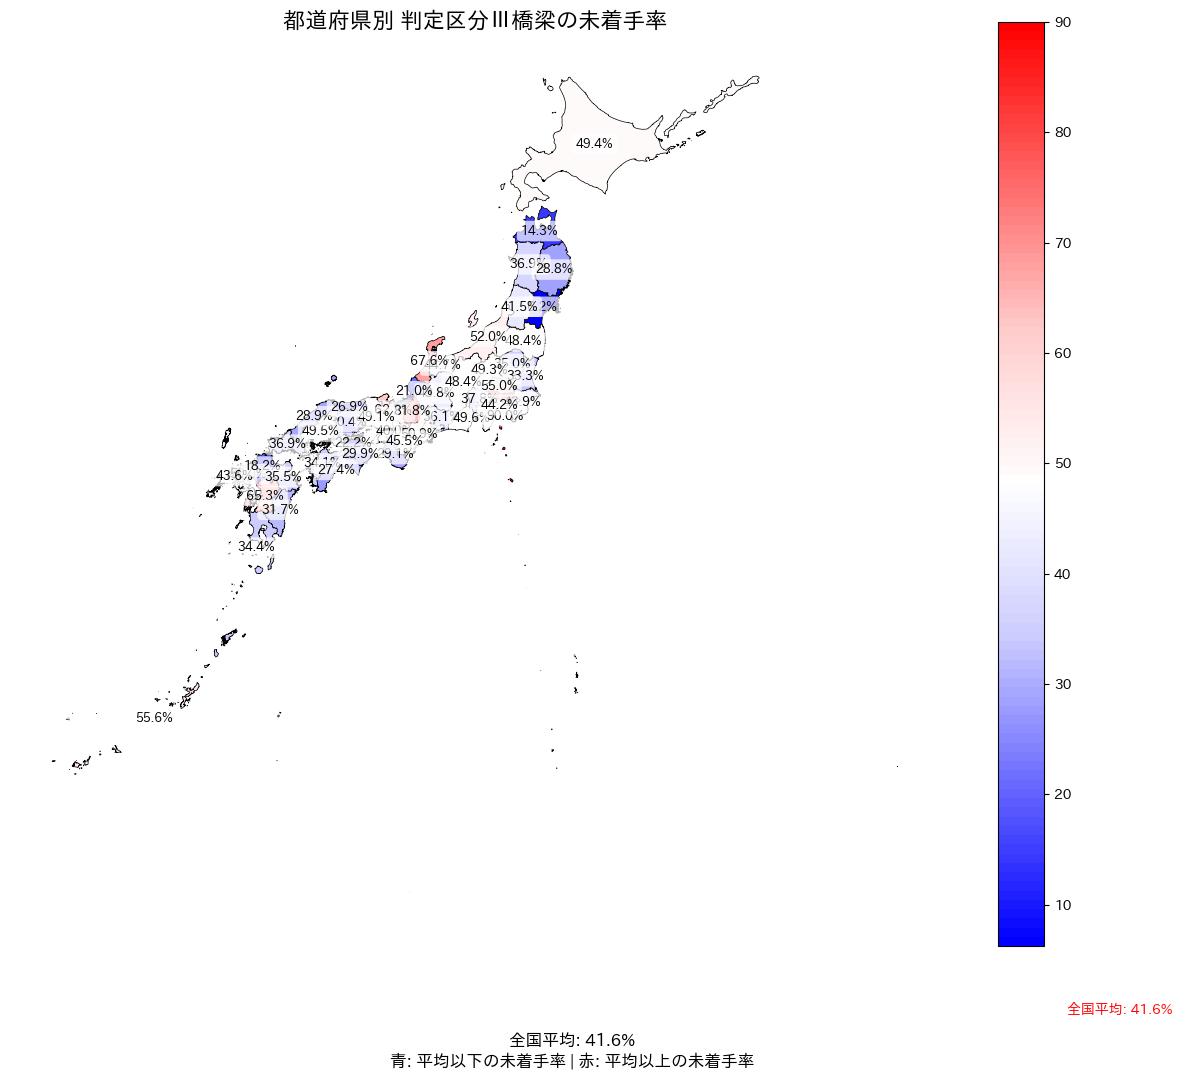

japan.geojson を削除しました


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap
import japanize_matplotlib
import numpy as np
import requests
import os

# -----------------------------------------------
# 1. データの読み込み
# -----------------------------------------------

# 計算済みのCSVファイルを読み込む
df_result = pd.read_csv('都道府県別_判定区分分析_簡易版.csv')

# CSVの最初の5行を表示して確認
print("CSVファイルの内容（最初の5行）:")
print(df_result.head())

# 列名を表示して確認
print("\n列名:")
print(df_result.columns.tolist())

# もし最初の列が都道府県名なら、それを明示的に指定
if '都道府県名' not in df_result.columns:
    df_result = df_result.rename(columns={df_result.columns[0]: '都道府県名'})

# 全国合計行を除外
df_result = df_result[~df_result['都道府県名'].str.contains('全国', na=False)]

# 判定区分Ⅲの未着手率を取得
if 'Ⅲ_未着手率(%)' in df_result.columns:
    column_name = 'Ⅲ_未着手率(%)'
elif '判定区分Ⅲ_未着手率(%)' in df_result.columns:
    column_name = '判定区分Ⅲ_未着手率(%)'
else:
    # 列名にⅢが含まれる未着手率列を探す
    for col in df_result.columns:
        if 'Ⅲ' in col and '未着手率' in col:
            column_name = col
            break
    else:
        column_name = '未着手率(%)'  # デフォルト

print(f"使用する列: {column_name}")

# 都道府県名の一覧を表示
print("\n分析データの都道府県名一覧:")
for i, pref in enumerate(sorted(df_result['都道府県名'].unique())):
    print(f"{i+1:2d}. {pref}")

# -----------------------------------------------
# 2. GeoJSONファイルの準備
# -----------------------------------------------

# 日本地図のGeoJSONファイルをダウンロード
geojson_url = 'https://raw.githubusercontent.com/dataofjapan/land/master/japan.geojson'
geojson_path = 'japan.geojson'

try:
    print(f"GeoJSONファイルをダウンロード中: {geojson_url}")
    response = requests.get(geojson_url)
    with open(geojson_path, 'wb') as f:
        f.write(response.content)
    print(f"ダウンロード完了: {geojson_path}")
except Exception as e:
    print(f"ダウンロードエラー: {e}")
    # ファイルが既にある場合はそのまま使用
    if not os.path.exists(geojson_path):
        print("エラー: GeoJSONファイルがありません")
        raise

# GeoJSONファイルを読み込む
japan = gpd.read_file(geojson_path)

# GeoJSONの基本情報を表示
print(f"\nGeoJSONファイルの形状: {japan.shape}")
print(f"GeoJSONファイルの列名: {japan.columns.tolist()}")

# 都道府県名が含まれる可能性のある列を調べる
print("\nGeoJSONファイルの各列のユニーク値数:")
prefecture_column = None

for col in japan.columns:
    if japan[col].dtype == object:  # 文字列列のみ
        n_unique = japan[col].nunique()
        print(f"- {col}: {n_unique} ユニーク値")
        
        # 都道府県数に近いもの (40-50) を候補とする
        if 40 <= n_unique <= 50:
            print(f"  最初の10個の値: {sorted(japan[col].unique())[:10]}")
            prefecture_column = col

# 都道府県名の列が見つからない場合、各列の内容を詳しく見る
if prefecture_column is None:
    print("\n都道府県名の列が見つかりませんでした。各列の内容を確認:")
    for col in japan.columns:
        if japan[col].dtype == object:  # 文字列列のみ
            print(f"\n列 '{col}' の最初の10個の値:")
            print(japan[col].head(10).tolist())

    # ユーザーが選択する（ここではデフォルトでnameを使用）
    for col_name in ['nam', 'name', 'NAME', 'pref']:
        if col_name in japan.columns:
            prefecture_column = col_name
            break
    else:
        # どれも見つからない場合は最初の文字列列
        for col in japan.columns:
            if japan[col].dtype == object:
                prefecture_column = col
                break

print(f"\n都道府県名の列として '{prefecture_column}' を使用します")

# 選択した列の全ての値を表示
print(f"\n列 '{prefecture_column}' の全ての値:")
for i, value in enumerate(sorted(japan[prefecture_column].unique())):
    print(f"{i+1:2d}. {value}")

# -----------------------------------------------
# 3. 都道府県名のマッピング
# -----------------------------------------------

# 都道府県名のマッピング関数
def standardize_prefecture_name(name):
    if pd.isna(name):
        return name
    
    name = str(name)
    
    # 英語名→日本語名のマッピング
    english_to_japanese = {
        'Hokkaido': '北海道',
        'Aomori': '青森',
        'Iwate': '岩手',
        'Miyagi': '宮城',
        'Akita': '秋田',
        'Yamagata': '山形',
        'Fukushima': '福島',
        'Ibaraki': '茨城',
        'Tochigi': '栃木',
        'Gunma': '群馬',
        'Saitama': '埼玉',
        'Chiba': '千葉',
        'Tokyo': '東京',
        'Kanagawa': '神奈川',
        'Niigata': '新潟',
        'Toyama': '富山',
        'Ishikawa': '石川',
        'Fukui': '福井',
        'Yamanashi': '山梨',
        'Nagano': '長野',
        'Gifu': '岐阜',
        'Shizuoka': '静岡',
        'Aichi': '愛知',
        'Mie': '三重',
        'Shiga': '滋賀',
        'Kyoto': '京都',
        'Osaka': '大阪',
        'Hyogo': '兵庫',
        'Nara': '奈良',
        'Wakayama': '和歌山',
        'Tottori': '鳥取',
        'Shimane': '島根',
        'Okayama': '岡山',
        'Hiroshima': '広島',
        'Yamaguchi': '山口',
        'Tokushima': '徳島',
        'Kagawa': '香川',
        'Ehime': '愛媛',
        'Kochi': '高知',
        'Fukuoka': '福岡',
        'Saga': '佐賀',
        'Nagasaki': '長崎',
        'Kumamoto': '熊本',
        'Oita': '大分',
        'Miyazaki': '宮崎',
        'Kagoshima': '鹿児島',
        'Okinawa': '沖縄'
    }
    
    # 英語名の変換
    if name in english_to_japanese:
        return english_to_japanese[name]
    
    # 「県」「都」「府」「道」を削除
    for suffix in ['県', '都', '府', '道']:
        if name.endswith(suffix):
            return name[:-1]
    
    return name

# 都道府県名を標準化
japan['prefecture'] = japan[prefecture_column].apply(standardize_prefecture_name)
df_result['prefecture'] = df_result['都道府県名'].apply(standardize_prefecture_name)

# 標準化結果を表示
print("\n標準化後の都道府県名:")
print("GeoJSON側:", sorted(japan['prefecture'].unique()))
print("分析データ側:", sorted(df_result['prefecture'].unique()))

# 手動マッピングが必要かチェック
geo_prefs = set(japan['prefecture'].unique())
data_prefs = set(df_result['prefecture'].unique())
common_prefs = geo_prefs & data_prefs

print(f"\n共通の都道府県名: {len(common_prefs)}個")
print(f"GeoJSONにあって分析データにない: {sorted(geo_prefs - data_prefs)}")
print(f"分析データにあってGeoJSONにない: {sorted(data_prefs - geo_prefs)}")

# 手動マッピングが必要な場合
if len(common_prefs) < 40:  # 47都道府県の大部分がマッピングできていない
    print("\n手動マッピングを作成します")
    
    # 完全な手動マッピング辞書
    manual_mapping = {
        # GeoJSONの表記: 分析データの表記
        # 例:
        # 'Tokyo': '東京都',
        # 'Hokkaido': '北海道',
    }
    
    # 実際のデータに基づいて手動マッピングを追加
    # これは実際のデータを見てから適宜調整する必要があります
    
    # 手動マッピングを適用
    japan['mapped_prefecture'] = japan['prefecture'].map(
        lambda x: manual_mapping.get(x, x)
    )
    
    # マッピングの結果を確認
    print("\n手動マッピング後:")
    print("マッピング後のGeoJSON側:", sorted(japan['mapped_prefecture'].unique()))
    
    # マージ用の列を更新
    geo_merge_col = 'mapped_prefecture'
else:
    geo_merge_col = 'prefecture'

# -----------------------------------------------
# 4. データのマージと地図の作成
# -----------------------------------------------

# データのマージ
print(f"\nデータをマージします：{geo_merge_col} と prefecture")
merged = japan.merge(df_result, left_on=geo_merge_col, right_on='prefecture', how='left')

# マージ結果を確認
print("\nマージ後のデータ（最初の5行）:")
cols_to_display = [geo_merge_col, 'prefecture', '都道府県名', column_name]
cols_to_display = [col for col in cols_to_display if col in merged.columns]
print(merged[cols_to_display].head())

# NaN値の数を確認
nan_count = merged[column_name].isna().sum()
print(f"\nNaN値の数: {nan_count}/{len(merged)}")

# 全国平均を計算
national_avg = df_result[column_name].mean()
print(f"\n全国平均 {column_name}: {national_avg:.2f}%")

# 色分け用のカラーマップ（青→白→赤）
colors = ['#0000FF', '#6666FF', '#CCCCFF', '#FFFFFF', '#FFCCCC', '#FF6666', '#FF0000']
cmap = LinearSegmentedColormap.from_list('blue_white_red', colors, N=100)

# NaN値がある場合の対処
if nan_count > 0:
    print("\n警告: マージ後にNaN値があります。マッピングを確認してください。")
    
    # 念のため、マッピングを詳細に確認
    for geo_pref in japan[geo_merge_col].unique():
        if geo_pref not in df_result['prefecture'].values:
            print(f"GeoJSON側: '{geo_pref}' は分析データに対応がありません")
    
    for data_pref in df_result['prefecture'].unique():
        if data_pref not in japan[geo_merge_col].values:
            print(f"分析データ側: '{data_pref}' はGeoJSONに対応がありません")

    # 直接対応付け（テストのみ）
    print("\n直接対応付けを試みます")
    test_merged = pd.DataFrame()
    test_merged['geometry'] = japan['geometry']
    
    # 都道府県名のリストを作成（順序が重要）
    geo_prefs_list = japan[geo_merge_col].tolist()
    data_prefs_list = []
    
    # 完全一致するものだけでも表示
    for geo_pref in geo_prefs_list:
        for data_pref in df_result['prefecture'].unique():
            if geo_pref == data_pref or geo_pref in data_pref or data_pref in geo_pref:
                data_prefs_list.append(data_pref)
                break
        else:
            data_prefs_list.append(None)
    
    print(f"マッチしたデータ: {len([x for x in data_prefs_list if x is not None])}/{len(data_prefs_list)}")
    
    # テスト用の値を設定
    test_merged[column_name] = [
        df_result[df_result['prefecture'] == pref][column_name].values[0] if pref in df_result['prefecture'].values else np.nan
        for pref in data_prefs_list
    ]
    
    # テスト用の地図を描画
    fig, ax = plt.subplots(figsize=(15, 12))
    test_merged.plot(column=column_name,
                    ax=ax,
                    legend=True,
                    cmap=cmap,
                    missing_kwds={'color': 'lightgrey'},
                    edgecolor='black',
                    linewidth=0.5)
    plt.title("テスト用の地図（直接対応付け）", fontsize=16)
    plt.axis('off')
    plt.savefig('test_map.png', dpi=300, bbox_inches='tight')
    plt.close()

# 地図の描画
fig, ax = plt.subplots(figsize=(15, 12))

# 地図データの列名を確認
print(f"\n地図データの列名: {merged.columns.tolist()}")

# データが問題なくマージできている場合
if column_name in merged.columns and merged[column_name].notna().sum() > 0:
    # 地図の描画
    merged.plot(column=column_name,
                ax=ax,
                legend=True,
                cmap=cmap,
                missing_kwds={'color': 'lightgrey'},
                edgecolor='black',
                linewidth=0.5)
    
    # 全国平均を示す赤い線をカラーバーに追加
    vmin = merged[column_name].min()
    vmax = merged[column_name].max()
    
    if not np.isnan(vmin) and not np.isnan(vmax):
        cbar = fig.get_axes()[1]  # カラーバー
        norm = (national_avg - vmin) / (vmax - vmin)
        cbar.axhline(y=norm, color='red', linestyle='-', linewidth=2)
        cbar.text(1.5, norm, f'全国平均: {national_avg:.1f}%', 
                ha='left', va='center', fontsize=10, color='red')
    
    # 各都道府県の中央に未着手率を表示
    for idx, row in merged.iterrows():
        if pd.notna(row.get(column_name)):
            centroid = row['geometry'].centroid
            ax.text(centroid.x, centroid.y, f"{row[column_name]:.1f}%", 
                    fontsize=9, ha='center', va='center', 
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
else:
    # データがマージできていない場合、地図のみ表示
    print("エラー: データが正しくマージできていません。地図のみ表示します。")
    japan.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)
    
    # 地図データに追加列を加えて、別途表示してみる
    japan['test_value'] = np.random.rand(len(japan)) * 100
    japan.plot(column='test_value', ax=ax, cmap=cmap, alpha=0.3)

# タイトルと説明
plt.title(f'都道府県別 判定区分Ⅲ橋梁の未着手率', fontsize=16)
plt.figtext(0.5, 0.01, 
            f'全国平均: {national_avg:.1f}%\n青: 平均以下の未着手率 | 赤: 平均以上の未着手率', 
            ha='center', fontsize=12)
ax.axis('off')

# 保存
plt.savefig('都道府県別_判定区分Ⅲ_未着手率地図.png', dpi=300, bbox_inches='tight')
plt.savefig('都道府県別_判定区分Ⅲ_未着手率地図.pdf', bbox_inches='tight')
plt.show()

# 一時ファイルの削除
if os.path.exists(geojson_path):
    try:
        os.remove(geojson_path)
        print(f"{geojson_path} を削除しました")
    except:
        print(f"{geojson_path} の削除に失敗しました")